In [1]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator
import matplotlib as mpl
import peakutils
import warnings
import pytz
import seaborn as sns
from scipy import stats
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

register_matplotlib_converters()

# File locations
#----------------
#the_gases = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/1oxaria/json/gap_filling/'
pngs = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/gap_filling/536_method/lockdown_stats/pngs/'
data_home = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/raw/0oxaria/gap_filling/jun_to_sept_2021/'
stats_home = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/gap_filling/536_method/lockdown_stats/'
aurn_path = '/home/tonyb/Gdrive/MinicondaProjects/oxaria/data/aurn/aurn_2016_2021/'


def _color_red_or_green(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color


In [2]:
# Load the dfs
# --------------
oxaria_pm = pd.read_feather(
    data_home+'oxaria_pm_stable15_full_corr_oct_2021_final_ts.ftr').set_index(['tag', 'rec','fname'])


In [3]:
oxaria_pm.head()

val.mtf1   val.pm1   val.mtf5  \
tag         rec                       fname                                     
scs-bgx-536 2020-10-14 00:00:00+00:00 High St  20.555555  2.871111  29.922222   
            2020-10-14 00:15:00+00:00 High St  20.355556  3.155555  29.500000   
            2020-10-14 00:30:00+00:00 High St  20.444445  3.013333  30.077778   
            2020-10-14 00:45:00+00:00 High St  20.588888  2.907778  29.822222   
            2020-10-14 01:00:00+00:00 High St  20.544445  2.776667  29.977777   

                                               val.pm2p5   val.mtf3  \
tag         rec                       fname                           
scs-bgx-536 2020-10-14 00:00:00+00:00 High St   5.732222  25.422222   
            2020-10-14 00:15:00+00:00 High St   6.136667  25.788889   
            2020-10-14 00:30:00+00:00 High St   5.808889  25.388889   
            2020-10-14 00:45:00+00:00 High St   5.808889  25.388889   
            2020-10-14 01:00:00+00:00 High St   5.643333  25.211111   

                                                val.pm10   val.mtf7  val.per  \
tag         rec                       fname                                    
scs-bgx-536 2020-10-14 00:00:00+00:00 High St  15.905556  22.344444      4.9   
            2020-10-14 00:15:00+00:00 High St  15.164445  26.211111      4.9   
            2020-10-14 00:30:00+00:00 High St  15.043333  21.655556      4.9   
            2020-10-14 00:45:00+00:00 High St  15.420000  20.811111      4.9   
            2020-10-14 01:00:00+00:00 High St  13.900000  23.444445      4.9   

                                                val.sfr  val.sht.hmd_p  ...  \
tag         rec                       fname                             ...   
scs-bgx-536 2020-10-14 00:00:00+00:00 High St  6.903222      46.772221  ...   
            2020-10-14 00:15:00+00:00 High St  7.031111      46.730000  ...   
            2020-10-14 00:30:00+00:00 High St  6.982333      46.612221  ...   
            2020-10-14 00:45:00+00:00 High St  6.875333      46.711113  ...   
            2020-10-14 01:00:00+00:00 High St  6.903222      46.843334  ...   

                                               pm10bl_1_c0_offset  \
tag         rec                       fname                         
scs-bgx-536 2020-10-14 00:00:00+00:00 High St            2.988664   
            2020-10-14 00:15:00+00:00 High St                 NaN   
            2020-10-14 00:30:00+00:00 High St            2.995346   
            2020-10-14 00:45:00+00:00 High St            3.000775   
            2020-10-14 01:00:00+00:00 High St            3.006204   

                                               val.pm10_1_c1  \
tag         rec                       fname                    
scs-bgx-536 2020-10-14 00:00:00+00:00 High St      15.335071   
            2020-10-14 00:15:00+00:00 High St            NaN   
            2020-10-14 00:30:00+00:00 High St      14.475156   
            2020-10-14 00:45:00+00:00 High St      14.855065   
            2020-10-14 01:00:00+00:00 High St      13.338307   

                                               val.pm2p5_1_c0_bl  \
tag         rec                       fname                        
scs-bgx-536 2020-10-14 00:00:00+00:00 High St           0.014693   
            2020-10-14 00:15:00+00:00 High St           0.014636   
            2020-10-14 00:30:00+00:00 High St           0.014579   
            2020-10-14 00:45:00+00:00 High St           0.014521   
            2020-10-14 01:00:00+00:00 High St           0.014464   

                                               pm25_ugg_s_bl  \
tag         rec                       fname                    
scs-bgx-536 2020-10-14 00:00:00+00:00 High St       1.537252   
            2020-10-14 00:15:00+00:00 High St       1.539774   
            2020-10-14 00:30:00+00:00 High St       1.542296   
            2020-10-14 00:45:00+00:00 High St       1.544818   
            2020-10-14 01:00:00+00:00 High St       1.547340   

        

In [4]:
# #sensor_location_types = pd.read_clipboard()

# sensor_location_types.iloc[1,0] = 'St Ebbes'
# sensor_location_types.iloc[12,0] = 'High St'
# sensor_location_types['Location name'] = sensor_location_types['Location name'].replace([" Road"," Street"], [" Rd"," St"], regex=True)
# sensor_location_types.to_csv(stats_home+'sensor_location_types.csv')

# sensor_location_types

In [5]:
# # Generate tables for materials & methods section
# #------------------------------------------------

# # create df of sensor location types
# sensor_types = sensor_location_types['Environment type'].values
# sensor_types_df = pd.DataFrame(sensor_types)

# # create a df of colocation
# colocation = ['Yes','No','Yes','No','No','No','No','No','No','No','No','No','No','No','No','No']
# colocation_df = pd.DataFrame(colocation)

# # merge types above on to sensor pm info
# tmpdf = oxaria_pm.reset_index().loc[:,['tag','name']].drop_duplicates().reset_index().merge(sensor_types_df,how='left', left_index=True,right_index=True).drop(columns='index')
# tmpdf = tmpdf.merge(colocation_df, how='left', left_index=True, right_index=True)#.drop(columns='index')
# tmpdf.columns = ['Sensor Id','Location name', 'Local environ type', 'Co-located with reference instrumentation']
# tmpdf['Location name'] = tmpdf['Location name'].replace(['Marsten','Jahlul','Road'], ['Marston','Ahlul','Rd'], regex=True)
# tmpdf.to_csv(stats_home+'sensor_name_types.csv')
# tmpdf

In [6]:
# # Creater another table, of lockdown dates for materials & methods
# #------------------------------------------------------------------
# lockdown_dates = pd.read_csv(stats_home+'lockdown_dates.csv', sep=',', usecols=[1,2,3,4,5,6])
# lockdown_dates['Start'] = pd.to_datetime(lockdown_dates['Start'], utc=True) 
# lockdown_dates['End'] = pd.to_datetime(lockdown_dates['End'], utc=True) 
# lockdown_dates['Length'] = (lockdown_dates['Start'] - lockdown_dates['End']) / np.timedelta64(1, 'D') * -1

# #lockdown_dates.to_csv(stats_home+'lockdown_dates.csv')
# lockdown_dates

In [7]:
def lockdown_codeup_ondate(df):
    df1 = df.reset_index().assign(ld_code=lambda x: x['rec'].apply(
        lambda y: 'a' if y < pd.to_datetime('2020-03-23', utc=True) else         # normal times
        ('b' if y < pd.to_datetime('2020-06-16', utc=True) else                   # lockdown 1
         ('c' if y < pd.to_datetime('2020-09-25', utc=True) else                   # easing 1-3 
          ('d' if y < pd.to_datetime('2020-11-05', utc=True) else                   # tier 1-2
           ('e' if y < pd.to_datetime('2020-12-02', utc=True) else                   # lockdown 2
            ('f' if y < pd.to_datetime('2021-01-05', utc=True) else                   # tier 4-2
             ('g' if y < pd.to_datetime('2021-03-08', utc=True) else                   # lockdown 3
              ('h' if y < pd.to_datetime('2021-04-12', utc=True) else                   # step 1
               ('i' if y < pd.to_datetime('2021-05-17', utc=True) else                   # step 2
                ('j' if y < pd.to_datetime('2021-06-21', utc=True) else 'k'               # step 3 else 17 # step 4
                )))))))))))
    return df1

def lockdown_codeup_onordinal_af(df):
    df1 = df.reset_index().assign(ld_code=lambda x: x['ordinal_days'].apply(
        lambda y: 'a' if y < pd.to_datetime('2020-03-23', utc=True).dayofyear else         # normal times
        ('b' if y < pd.to_datetime('2020-06-16', utc=True).dayofyear else                    # lockdown 1
         ('c' if y < pd.to_datetime('2020-09-25', utc=True).dayofyear else                    # easing 1-3 
          ('d' if y < pd.to_datetime('2020-11-05', utc=True).dayofyear else                    # tier 1-2
           ('e' if y < pd.to_datetime('2020-12-02', utc=True).dayofyear else 'f'                # lockdown 2
             ))))))
    return df1                  
                  
def lockdown_codeup_onordinal_fk(df):
    df2 = df.reset_index().assign(ld_code=lambda x: x['ordinal_days'].apply(
        lambda y: 'f' if y < pd.to_datetime('2021-01-05', utc=True).dayofyear else           # tier 4-2
        ('g' if y < pd.to_datetime('2021-03-08', utc=True).dayofyear else                    # lockdown 3
         ('h' if y < pd.to_datetime('2021-04-12', utc=True).dayofyear else                    # step1
          ('i' if y < pd.to_datetime('2021-05-17', utc=True).dayofyear else                    # step2
           ('j' if y < pd.to_datetime('2021-06-21', utc=True).dayofyear else  'k'               # step 3 else 17 # step 4
           ))))))
    return df2


In [8]:
# Code up 15-min sensor data by lockdown event dates & calculate descriptive stats
#----------------------------------------------------------------------------------
# Added a resample to 1-hr mean step to replicate stats calcs done for sebbes data which is at 1-hr mean level
df = oxaria_pm[['val.pm10_1_c2_SH_xt_cor','val.pm2p5_1_c2_S_xt_cor']].groupby([pd.Grouper(level='fname'),
                                                                               pd.Grouper(level='rec', freq='24H')]
                                                                             ).describe(percentiles=[0.90, 0.95])
df.rename(columns={'50%':'p50','90%':'p90','95%':'p95'}, inplace=True)
cnames1 = df.iloc[:,[0,1,2,3,4,5,6,7]].add_prefix('pm10_').columns.droplevel().tolist()
cnames2 = df.iloc[:,[8,9,10,11,12,13,14,15]].add_prefix('pm25_').columns.droplevel().tolist()
new_cols = cnames1 + cnames2
df.columns = new_cols
df.reset_index().to_feather(stats_home+'all_sensor_data_hourly_fcor_9095.ftr')
df

pm10_count  pm10_mean  pm10_std  \
fname             rec                                                          
Ahlul Bayt Mosque 2020-08-24 00:00:00+00:00        12.0   7.952646  4.690424   
                  2020-08-25 00:00:00+00:00        52.0   7.354597  2.683371   
                  2020-08-26 00:00:00+00:00        52.0   7.708317  2.532857   
                  2020-08-27 00:00:00+00:00        93.0  12.283199  2.774097   
                  2020-08-28 00:00:00+00:00        67.0   7.572427  2.818146   
...                                                 ...        ...       ...   
Worcester College 2021-09-27 00:00:00+00:00        41.0   5.782544  1.554335   
                  2021-09-28 00:00:00+00:00        58.0   8.334442  1.731578   
                  2021-09-29 00:00:00+00:00        12.0   5.580304  2.033892   
                  2021-09-30 00:00:00+00:00        43.0   7.241805  2.645207   
                  2021-10-01 00:00:00+00:00         0.0        NaN       NaN   

                                             pm10_min   pm10_p50   pm10_p90  \
fname             rec                                                         
Ahlul Bayt Mosque 2020-08-24 00:00:00+00:00  4.452769   7.124085   7.587656   
                  2020-08-25 00:00:00+00:00  2.360231   8.017421  10.209729   
                  2020-08-26 00:00:00+00:00  4.462604   7.152936  11.898879   
                  2020-08-27 00:00:00+00:00  6.123865  11.706035  15.901752   
                  2020-08-28 00:00:00+00:00  3.783221   7.220872  10.211047   
...                                               ...        ...        ...   
Worcester College 2021-09-27 00:00:00+00:00  3.203328   5.780949   7.893207   
                  2021-09-28 00:00:00+00:00  3.752732   8.286094  10.693214   
                  2021-09-29 00:00:00+00:00  3.484669   4.962007   8.652796   
                  2021-09-30 00:00:00+00:00  3.251400   7.026726  10.441737   
                  2021-10-01 00:00:00+00:00       NaN        NaN        NaN   

                                              pm10_p95   pm10_max  pm25_count  \
fname             rec                                                           
Ahlul Bayt Mosque 2020-08-24 00:00:00+00:00  14.328107  22.545594        18.0   
                  2020-08-25 00:00:00+00:00  10.351464  11.318841        79.0   
                  2020-08-26 00:00:00+00:00  12.090949  13.799272        54.0   
                  2020-08-27 00:00:00+00:00  16.930179  21.701420        96.0   
                  2020-08-28 00:00:00+00:00  11.399162  22.187805        93.0   
...                                                ...        ...         ...   
Worcester College 2021-09-27 00:00:00+00:00   8.191074   9.029831        49.0   
                  2021-09-28 00:00:00+00:00  11.254139  12.310269        61.0   
                  2021-09-29 00:00:00+00:00   9.470717  10.172286        14.0   
                  2021-09-30 00:00:00+00:00  12.261276  15.181786        51.0   
                  2021-10-01 00:00:00+00:00        NaN        NaN         1.0   

                                             pm25_mean  pm25_std  pm25_min  \
fname             rec                                                        
Ahlul Bayt Mosque 2020-08-24 00:00:00+00:00   2.199089  1.113665  0.858769   
                  2020-08-25 00:00:00+00:00   3.630088  3.021456  0.198754   
                  2020-08-26 00:00:00+00:00   4.809805  1.899563  2.041483   
                  2020-08-27 00:00:00+00:00   8.332971  2.719317  5.189830   
                  2020-08-28 00:00:00+00:00   3.732493  2.275533  0.843566   
...                                                ...       ...       ...   
Worcester College 2021-09-27 00:00:00+00:00   3.562348  1.174231  0.650043   
                  2021-09-28 00:00:00+00:00   5.419416  1.215315  0.995001   
                  2021-09-29 00:00:00+00:00   2.901159  0.965911  1.510046   
                  2021-09-30 00:00:00+00:00   3.513054  2.081902

In [9]:
# Code up the dates with lockdown event codes & calc event stats
#----------------------------------------------------------------

# Calc ordinal day & hours
df['ordinal_hrs'] = df.index.get_level_values(1).hour
df['ordinal_days'] = df.index.get_level_values(1).dayofyear
display(df)


pm10_count  pm10_mean  pm10_std  \
fname             rec                                                          
Ahlul Bayt Mosque 2020-08-24 00:00:00+00:00        12.0   7.952646  4.690424   
                  2020-08-25 00:00:00+00:00        52.0   7.354597  2.683371   
                  2020-08-26 00:00:00+00:00        52.0   7.708317  2.532857   
                  2020-08-27 00:00:00+00:00        93.0  12.283199  2.774097   
                  2020-08-28 00:00:00+00:00        67.0   7.572427  2.818146   
...                                                 ...        ...       ...   
Worcester College 2021-09-27 00:00:00+00:00        41.0   5.782544  1.554335   
                  2021-09-28 00:00:00+00:00        58.0   8.334442  1.731578   
                  2021-09-29 00:00:00+00:00        12.0   5.580304  2.033892   
                  2021-09-30 00:00:00+00:00        43.0   7.241805  2.645207   
                  2021-10-01 00:00:00+00:00         0.0        NaN       NaN   

                                             pm10_min   pm10_p50   pm10_p90  \
fname             rec                                                         
Ahlul Bayt Mosque 2020-08-24 00:00:00+00:00  4.452769   7.124085   7.587656   
                  2020-08-25 00:00:00+00:00  2.360231   8.017421  10.209729   
                  2020-08-26 00:00:00+00:00  4.462604   7.152936  11.898879   
                  2020-08-27 00:00:00+00:00  6.123865  11.706035  15.901752   
                  2020-08-28 00:00:00+00:00  3.783221   7.220872  10.211047   
...                                               ...        ...        ...   
Worcester College 2021-09-27 00:00:00+00:00  3.203328   5.780949   7.893207   
                  2021-09-28 00:00:00+00:00  3.752732   8.286094  10.693214   
                  2021-09-29 00:00:00+00:00  3.484669   4.962007   8.652796   
                  2021-09-30 00:00:00+00:00  3.251400   7.026726  10.441737   
                  2021-10-01 00:00:00+00:00       NaN        NaN        NaN   

                                              pm10_p95   pm10_max  pm25_count  \
fname             rec                                                           
Ahlul Bayt Mosque 2020-08-24 00:00:00+00:00  14.328107  22.545594        18.0   
                  2020-08-25 00:00:00+00:00  10.351464  11.318841        79.0   
                  2020-08-26 00:00:00+00:00  12.090949  13.799272        54.0   
                  2020-08-27 00:00:00+00:00  16.930179  21.701420        96.0   
                  2020-08-28 00:00:00+00:00  11.399162  22.187805        93.0   
...                                                ...        ...         ...   
Worcester College 2021-09-27 00:00:00+00:00   8.191074   9.029831        49.0   
                  2021-09-28 00:00:00+00:00  11.254139  12.310269        61.0   
                  2021-09-29 00:00:00+00:00   9.470717  10.172286        14.0   
                  2021-09-30 00:00:00+00:00  12.261276  15.181786        51.0   
                  2021-10-01 00:00:00+00:00        NaN        NaN         1.0   

                                             pm25_mean  pm25_std  pm25_min  \
fname             rec                                                        
Ahlul Bayt Mosque 2020-08-24 00:00:00+00:00   2.199089  1.113665  0.858769   
                  2020-08-25 00:00:00+00:00   3.630088  3.021456  0.198754   
                  2020-08-26 00:00:00+00:00   4.809805  1.899563  2.041483   
                  2020-08-27 00:00:00+00:00   8.332971  2.719317  5.189830   
                  2020-08-28 00:00:00+00:00   3.732493  2.275533  0.843566   
...                                                ...       ...       ...   
Worcester College 2021-09-27 00:00:00+00:00   3.562348  1.174231  0.650043   
                  2021-09-28 00:00:00+00:00   5.419416  1.215315  0.995001   
                  2021-09-29 00:00:00+00:00   2.901159  0.965911  1.510046   
                  2021-09-30 00:00:00+00:00   3.513054  2.081902

In [10]:
# Subset sesnor obs in 2020 & 2021
jan21 = pd.to_datetime('2021-01-01', utc=True)

sensors20 = df.query('rec < @jan21')
sensors21 = df.query('rec >= @jan21')

# Assign codes for 2020 grouped by fname
tmplist = []
for i, r in sensors20.groupby('fname'):
    dftmp = lockdown_codeup_onordinal_af(r)
    tmplist.append(dftmp)
sensors20 = pd.concat(tmplist)

# Assign codes for 2021 grouped by fname
tmplist = []
for i, r in sensors21.groupby('fname'):
    dftmp = lockdown_codeup_onordinal_fk(r)
    tmplist.append(dftmp)
sensors21 = pd.concat(tmplist)

# Aggreggate
sensors_24hr = pd.concat([sensors20,sensors21])
display(sensors_24hr)

sensors_24hr.reset_index().to_feather(stats_home+'sensors_24hr_9095.ftr')

,fname,rec,pm10_count,pm10_mean,pm10_std,pm10_min,pm10_p50,pm10_p90,pm10_p95,pm10_max,...,pm25_mean,pm25_std,pm25_min,pm25_p50,pm25_p90,pm25_p95,pm25_max,ordinal_hrs,ordinal_days,ld_code
0,Ahlul Bayt Mosque,2020-08-24 00:00:00+00:00,12.0,7.952646,4.690424,4.452769,7.124085,7.587656,14.328107,22.545594,...,2.199089,1.113665,0.858769,2.192919,3.730718,3.873972,4.037513,0,237,c
1,Ahlul Bayt Mosque,2020-08-25 00:00:00+00:00,52.0,7.354597,2.683371,2.360231,8.017421,10.209729,10.351464,11.318841,...,3.630088,3.021456,0.198754,3.960070,7.065414,7.899002,11.909580,0,238,c
2,Ahlul Bayt Mosque,2020-08-26 00:00:00+00:00,52.0,7.708317,2.532857,4.462604,7.152936,11.898879,12.090949,13.799272,...,4.809805,1.899563,2.041483,4.835122,7.409988,7.514912,8.296340,0,239,c
3,Ahlul Bayt Mosque,2020-08-27 00:00:00+00:00,93.0,12.283199,2.774097,6.123865,11.706035,15.901752,16.930179,21.701420,...,8.332971,2.719317,5.189830,7.130593,13.153130,13.685830,15.301650,0,240,c
4,Ahlul Bayt Mosque,2020-08-28 00:00:00+00:00,67.0,7.572427,2.818146,3.783221,7.220872,10.211047,11.399162,22.187805,...,3.732493,2.275533,0.843566,3.654853,5.669046,9.127783,11.434105,0,241,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Worcester College,2021-09-27 00:00:00+00:00,41.0,5.782544,1.554335,3.203328,5.780949,7.893207,8.191074,9.029831,...,3.562348,1.174231,0.650043,3.756657,4.693492,5.027340,5.476766,0,270,k
263,Worcester College,2021-09-28 00:00:00+00:00,58.0,8.334442,1.731578,3.752732,8.286094,10.693214,11.254139,12.310269,...,5.419416,1.215315,0.995001,5.477320,6.416595,7.009682,9.116414,0,271,k
264,Worcester College,2021-09-29 00:00:00+00:00,12.0,5.580304,2.033892,3.484669,4.962007,8.652796,9.470717,10.172286,...,2.901159,0.965911,1.510046,2.606783,4.341330,4.587047,4.628774,0,272,k
265,Worcester College,2021-09-30 00:00:00+00:00,43.0,7.241805,2.645207,3.251400,7.026726,10.441737,12.261276,15.181786,...,3.513054,2.081902,0.600500,3.866543,5.925010,6.160211,8.954279,0,273,k


In [11]:
# Fill gaps in data with NaNs for easy plotting - pm10
#------------------------------------------------------

sensor_ld_event_stats = sensors_24hr.groupby(['fname','ld_code']).mean().sort_values(['fname','ld_code'])
sensors = pd.DataFrame(sorted(list(sensor_ld_event_stats.index.get_level_values(0).unique())), columns=['sensor'])
events = pd.DataFrame(sorted(['a','b','c','d','e','f','g','h','i','j','k']))

tmplist = []
for i, j in sensors.iterrows():
    for ii, jj in events.iterrows():
        tmp = pd.DataFrame(zip(j,jj), columns=['sensors','events'])
        tmplist.append(tmp)
sevents = pd.concat(tmplist).reset_index(drop=True)

sensor_ld_event_stats_1 = sevents.merge(sensor_ld_event_stats.reset_index(), left_on=['sensors','events'], right_on=['fname','ld_code'], how='left')
sensor_ld_event_stats_1['ld_code'] = sensor_ld_event_stats_1['events']
sensor_ld_event_stats_1['fname'] = sensor_ld_event_stats_1['sensors']
sensor_ld_event_stats_1.drop(['sensors','events'], inplace=True, axis=1)
sensor_ld_event_stats_1.set_index('ld_code', inplace=True)

display(sensor_ld_event_stats_1.head(20))#,sensor_ld_event_desc_pm25_1.head(20))

,fname,pm10_count,pm10_mean,pm10_std,pm10_min,pm10_p50,pm10_p90,pm10_p95,pm10_max,pm25_count,pm25_mean,pm25_std,pm25_min,pm25_p50,pm25_p90,pm25_p95,pm25_max,ordinal_hrs,ordinal_days
ld_code,,,,,,,,,,,,,,,,,,,
a,Ahlul Bayt Mosque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,Ahlul Bayt Mosque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c,Ahlul Bayt Mosque,59.718750,10.244155,3.139532,5.122155,9.941648,13.986037,15.149160,18.681813,66.500000,6.612262,2.233511,3.190816,6.472764,9.413298,10.183209,12.704633,0.0,252.500000
d,Ahlul Bayt Mosque,72.365854,8.573514,2.683003,4.194677,8.212415,12.122896,13.071450,15.978199,83.780488,6.435228,2.400096,2.267201,6.237724,9.602221,10.443896,12.566268,0.0,289.000000
e,Ahlul Bayt Mosque,84.925926,11.329920,4.453122,4.168639,10.672938,17.098439,19.190333,22.932912,91.370370,10.924649,3.805420,4.140153,10.479789,16.079356,17.356113,20.021781,0.0,323.000000
f,Ahlul Bayt Mosque,83.235294,8.790611,3.126866,4.070478,8.272435,12.755237,14.503694,19.352727,91.529412,7.973788,3.051952,3.247290,7.344246,12.065043,13.315954,16.717865,0.0,310.441176
g,Ahlul Bayt Mosque,68.177419,10.531673,3.382848,5.138399,10.135570,14.790873,16.343625,19.605914,78.725806,10.126914,3.190791,4.850951,9.707187,14.309556,15.779722,17.871425,0.0,35.500000
h,Ahlul Bayt Mosque,46.142857,10.424421,2.904042,5.780947,10.044501,14.053189,15.022874,18.120336,59.257143,9.574770,2.751822,5.053301,9.292334,13.257728,14.220431,16.361771,0.0,84.000000
i,Ahlul Bayt Mosque,40.057143,11.853372,3.222011,6.902251,11.589354,15.903065,16.955335,19.736858,46.228571,10.483765,2.221172,6.510053,10.376887,13.329845,13.794669,15.036128,0.0,119.000000


In [12]:
# Load sebbes typical values 2016-21 for graphing
#-------------------------------------------------
sebbes_pm10_ld_event_desc_mean = pd.read_feather(stats_home+'sebbes_ordinal_daymean_codeup_ak_mean_desc_pm10_1619_9095.ftr')
sebbes_pm25_ld_event_desc_mean = pd.read_feather(stats_home+'sebbes_ordinal_daymean_codeup_ak_mean_desc_pm25_1619_9095.ftr')


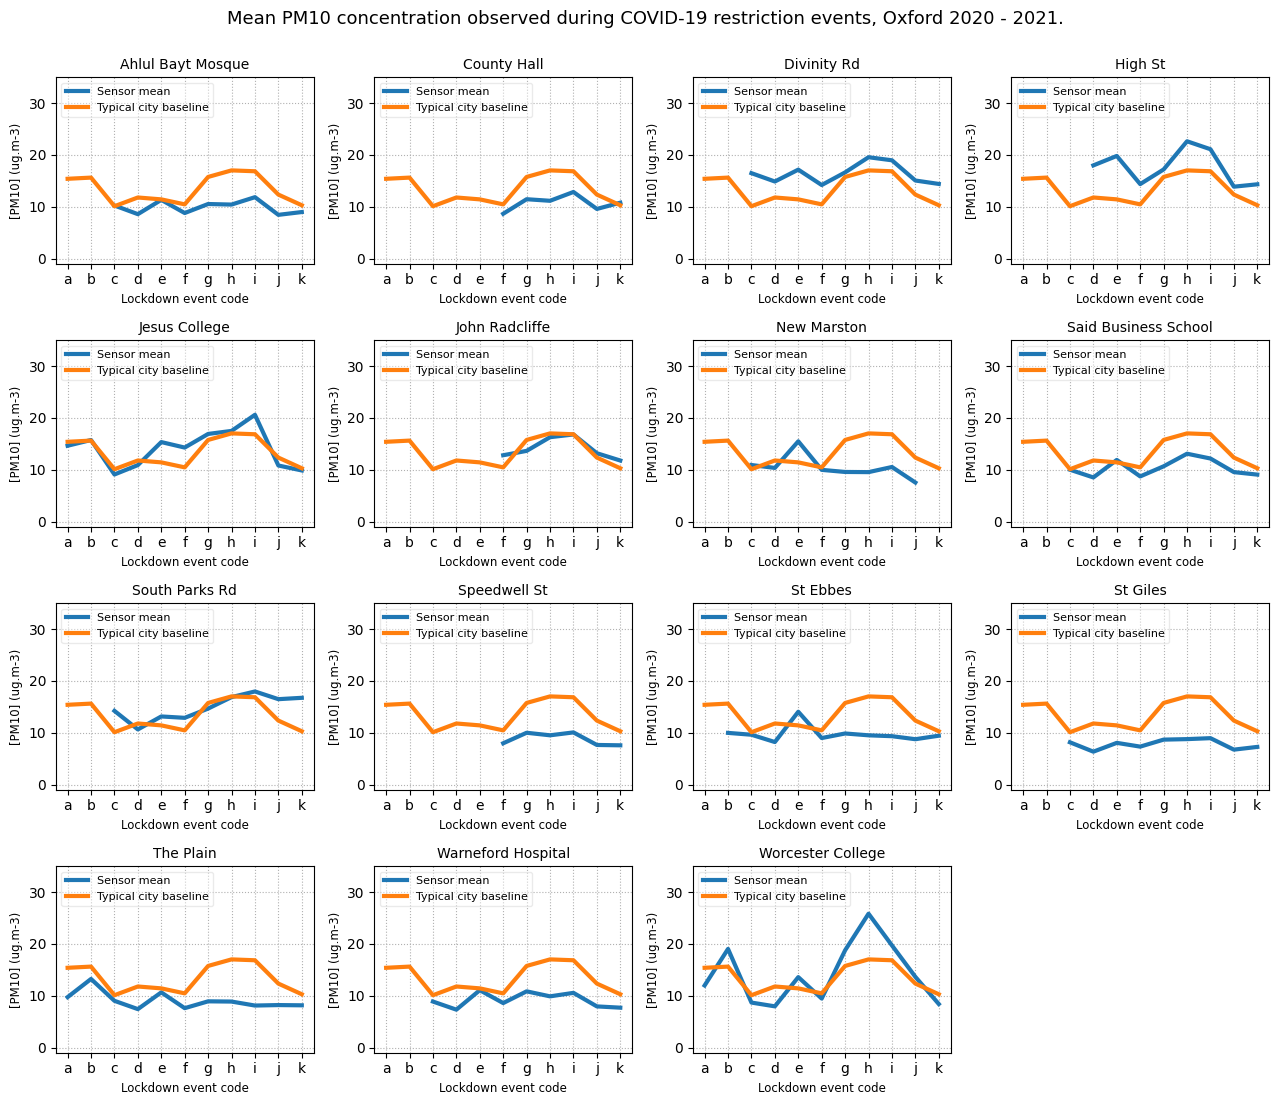

,count,mean,std,min,25%,50%,75%,90%,95%,max,metric
fname,,,,,,,,,,,
Ahlul Bayt Mosque,9.0,9.907664,1.255888,8.440139,8.790611,10.244155,10.531673,11.434610,11.643991,11.853372,pm10_mean
County Hall,6.0,10.748147,1.476187,8.648486,9.881707,10.972945,11.383045,12.157983,12.507391,12.856799,pm10_mean
Divinity Rd,9.0,16.378420,1.943231,14.199028,14.879767,16.492131,17.169697,19.094926,19.331324,19.567723,pm10_mean
High St,8.0,17.671985,3.335329,13.879433,14.368326,17.599574,20.141493,21.573167,22.111361,22.649555,pm10_mean
Jesus College,11.0,14.159355,3.613201,9.091214,10.864564,14.640859,16.333282,17.503930,19.061586,20.619242,pm10_mean
John Radcliffe,6.0,14.091621,2.012848,11.785835,12.903026,13.422593,15.633484,16.556535,16.687478,16.818421,pm10_mean
New Marston,8.0,10.492495,2.266522,7.534520,9.568256,10.170257,10.630070,12.289046,13.891397,15.493748,pm10_mean
Said Business School,9.0,10.410707,1.650442,8.517385,9.065317,10.010022,11.899154,12.358401,12.729437,13.100472,pm10_mean
South Parks Rd,9.0,14.854683,2.374318,10.644060,13.151841,14.671564,16.752090,17.106710,17.542338,17.977966,pm10_mean


In [13]:
# Hybrid St Ebbes-High St PM10 sensor correction vs St Ebbes refs
# ----------------------------------------------------------------

# Variables
# ----------
df = sensor_ld_event_stats_1.iloc[:,0:9].reset_index().merge(sebbes_pm10_ld_event_desc_mean[['ld_code','pm10_mean','pm10_90%','pm10_95%']], 
                                                             left_on='ld_code',
                                                             right_on='ld_code',
                                                             how='left',
                                                             suffixes=(None,'_s')
                                                            ).rename(columns={'pm10_90%':'pm10_p90_s', 'pm10_95%':'pm10_p95_s'}).set_index(['ld_code'])

x_labels = [
    'a','b','c','d','e','f','g','h','i','j','k'
]

x_labels_df = pd.DataFrame(x_labels,columns=['event'])

x_ticks = range(len(x_labels))

plt.style.use('default')

fig, axes = plt.subplots(nrows=4,
                         ncols=4,
                         sharex=False,
                         sharey=False,
                         figsize=(13, 11))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Mean PM10 concentration observed during COVID-19 restriction events, Oxford 2020 - 2021.',
             fontsize=13,
             y=1)
linregress = []
for i, r in df.groupby('fname'):
    if axes_list:  # if empty_list will evaluate as false.
            ax = axes_list.pop(0)
    
    ax.plot(r['pm10_mean'], lw=3, marker = '', label='Sensor mean')
    ax.plot(r['pm10_mean_s'], lw=3, marker = '', label='Typical city baseline')
    #ax.plot(r['pm10y_mean'], lw=3, marker = '', label='Lowess mean (St Ebbes)')

    ax.set_title(i, fontsize=10)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8.5)
    ax.set_xlabel('Lockdown event code', fontsize=8.5)
    ax.set_ylim(-1,35)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.legend(framealpha=0.4, loc='upper left', markerscale=3, fontsize=8, ncol=1)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.tight_layout()
    ax.grid(True,ls=':')

fig.delaxes(axes_list.pop(-1))

#plt.savefig(stats_home+'sensor_ld_event_desc_pm10_1_mean_95.png')
plt.show()

for ax in axes_list:
    ax.remove()

stats_df = pd.DataFrame()    
df = df.reset_index(drop=True).set_index('fname').groupby('fname').describe(percentiles=[0.25,0.5,0.75,0.9,0.95])['pm10_mean']
df['metric'] = 'pm10_mean'
stats_df = stats_df.append(df)
display(stats_df)



In [14]:
sebbes_pm25_ld_event_desc_mean

,ld_code,pm25_mean,pm25_50%,pm25_90%,pm25_95%,pm25_max,poll
0,a,12.349181,10.149383,23.932593,27.024568,32.979012,pm25
1,b,12.203299,10.347647,21.877412,25.012412,30.438824,pm25
2,c,6.994023,6.302000,11.900386,13.549355,17.659040,pm25
3,d,8.202249,6.330573,16.217410,19.587518,25.908854,pm25
4,e,9.327398,8.441611,16.358181,18.648904,24.948630,pm25
5,f,7.701672,6.847859,14.668581,16.634011,20.666438,pm25
6,g,12.870203,10.554032,24.830645,28.125242,34.075806,pm25
7,h,13.164310,10.760000,25.050571,28.549429,36.845714,pm25
8,i,12.835871,10.670000,23.410286,26.996429,31.888571,pm25
9,j,10.084645,9.050000,17.376286,19.282000,22.751429,pm25


In [15]:
sensor_ld_event_stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, a to k
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fname         165 non-null    object 
 1   pm10_count    131 non-null    float64
 2   pm10_mean     131 non-null    float64
 3   pm10_std      131 non-null    float64
 4   pm10_min      131 non-null    float64
 5   pm10_p50      131 non-null    float64
 6   pm10_p90      131 non-null    float64
 7   pm10_p95      131 non-null    float64
 8   pm10_max      131 non-null    float64
 9   pm25_count    131 non-null    float64
 10  pm25_mean     131 non-null    float64
 11  pm25_std      131 non-null    float64
 12  pm25_min      131 non-null    float64
 13  pm25_p50      131 non-null    float64
 14  pm25_p90      131 non-null    float64
 15  pm25_p95      131 non-null    float64
 16  pm25_max      131 non-null    float64
 17  ordinal_hrs   131 non-null    float64
 18  ordinal_days  131 non-null    float64

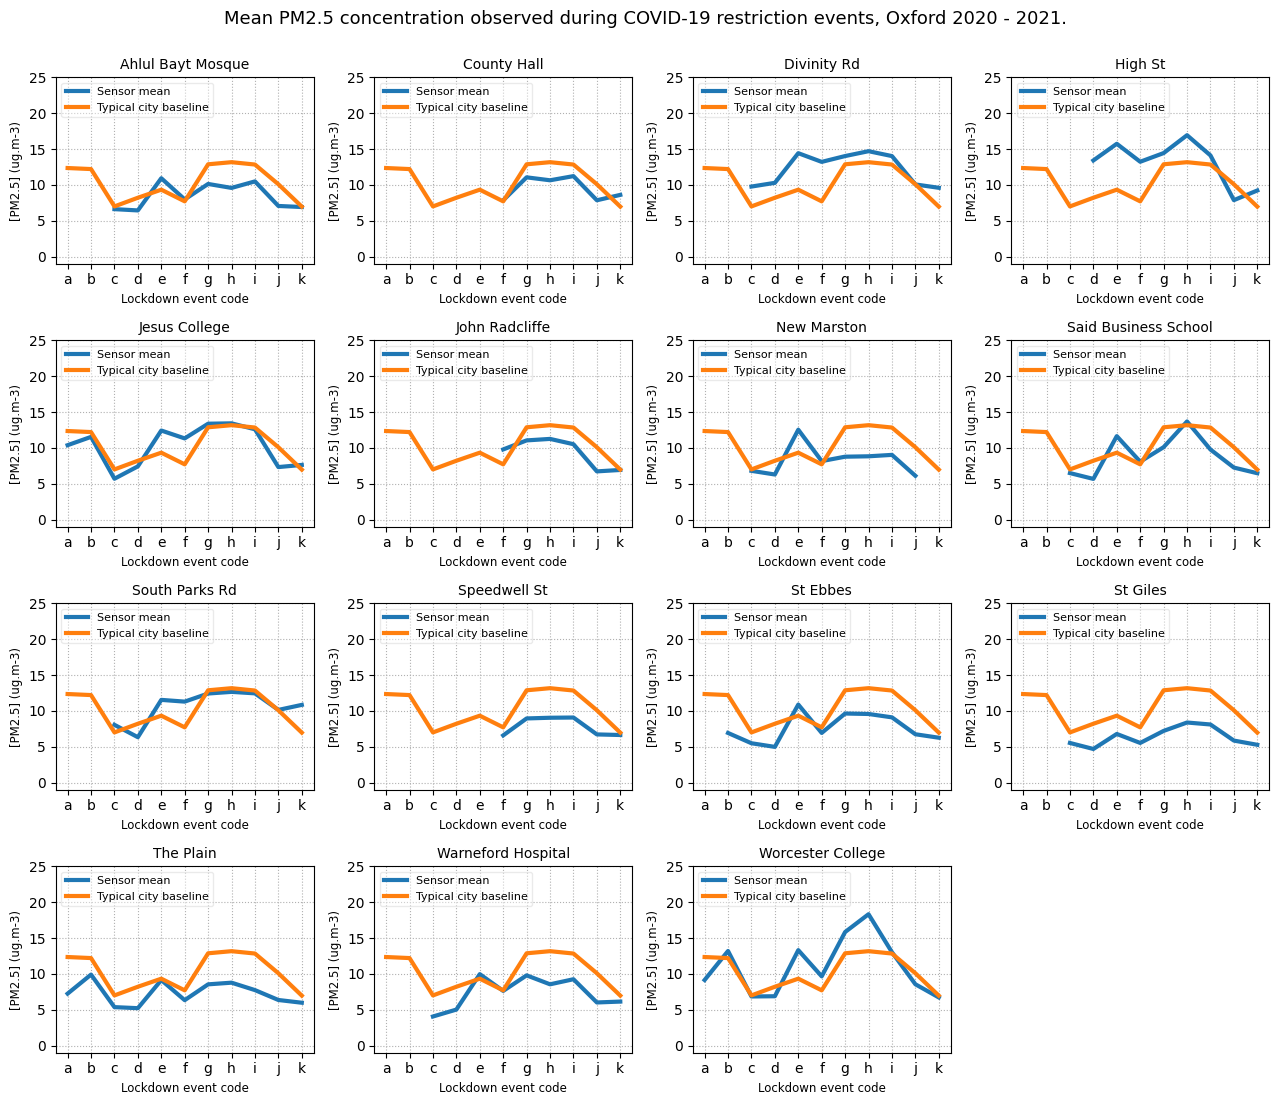

,count,mean,std,min,25%,50%,75%,90%,95%,max,metric
fname,,,,,,,,,,,
Ahlul Bayt Mosque,9.0,9.907664,1.255888,8.440139,8.790611,10.244155,10.531673,11.434610,11.643991,11.853372,pm10_mean
County Hall,6.0,10.748147,1.476187,8.648486,9.881707,10.972945,11.383045,12.157983,12.507391,12.856799,pm10_mean
Divinity Rd,9.0,16.378420,1.943231,14.199028,14.879767,16.492131,17.169697,19.094926,19.331324,19.567723,pm10_mean
High St,8.0,17.671985,3.335329,13.879433,14.368326,17.599574,20.141493,21.573167,22.111361,22.649555,pm10_mean
Jesus College,11.0,14.159355,3.613201,9.091214,10.864564,14.640859,16.333282,17.503930,19.061586,20.619242,pm10_mean
John Radcliffe,6.0,14.091621,2.012848,11.785835,12.903026,13.422593,15.633484,16.556535,16.687478,16.818421,pm10_mean
New Marston,8.0,10.492495,2.266522,7.534520,9.568256,10.170257,10.630070,12.289046,13.891397,15.493748,pm10_mean
Said Business School,9.0,10.410707,1.650442,8.517385,9.065317,10.010022,11.899154,12.358401,12.729437,13.100472,pm10_mean
South Parks Rd,9.0,14.854683,2.374318,10.644060,13.151841,14.671564,16.752090,17.106710,17.542338,17.977966,pm10_mean


In [16]:
# Hybrid St Ebbes-High St PM2.5 sensor correction vs St Ebbes refs
# ----------------------------------------------------------------

# Variables
df = sensor_ld_event_stats_1.iloc[:,[0,9,10,11,12,13,14,15,16]].reset_index().merge(sebbes_pm25_ld_event_desc_mean[['ld_code','pm25_mean','pm25_90%','pm25_95%']], 
                                                             left_on='ld_code',
                                                             right_on='ld_code',
                                                             how='left',
                                                             suffixes=(None,'_s')
                                                            ).rename(columns={'pm25_90%':'pm25_p90_s', 'pm25_95%':'pm25_p95_s'}).set_index(['ld_code'])
x_labels = [
    'a','b','c','d','e','f','g','h','i','j','k'
]

x_labels_df = pd.DataFrame(x_labels,columns=['event'])

x_ticks = range(len(x_labels))

plt.style.use('default')

fig, axes = plt.subplots(nrows=4,
                         ncols=4,
                         sharex=False,
                         sharey=False,
                         figsize=(13, 11))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('Mean PM2.5 concentration observed during COVID-19 restriction events, Oxford 2020 - 2021.',
             fontsize=13,
             y=1)

for i, r in df.groupby('fname'):
    if axes_list:  # if empty_list will evaluate as false.
            ax = axes_list.pop(0)
    
    ax.plot(r['pm25_mean'], lw=3, marker = '', label='Sensor mean')
    ax.plot(r['pm25_mean_s'], lw=3, marker = '', label='Typical city baseline')
    #ax.plot(r['pm25y_mean'], lw=3, marker = '', label='Lowess mean (St Ebbes)')

    ax.set_title(i, fontsize=10)
    ax.set_ylabel('[PM2.5] (ug.m-3)', fontsize=8.5)
    ax.set_xlabel('Lockdown event code', fontsize=8.5)
    ax.set_ylim(-1,25)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.legend(framealpha=0.4, loc='upper left', markerscale=3, fontsize=8, ncol=1)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.tight_layout()
    ax.grid(True,ls=':')
    #print(mae_dat)

fig.delaxes(axes_list.pop(-1))

#plt.savefig(stats_home+'sensor_ld_event_desc_pm25_1_mean_95.png')
plt.show()

for ax in axes_list:
    ax.remove()
    
df = df.reset_index(drop=True).set_index('fname').groupby('fname').describe(percentiles=[0.25,0.5,0.75,0.9,0.95])['pm25_mean']
df['metric'] = 'pm25_mean'
stats_df = stats_df.append(df)
display(stats_df)

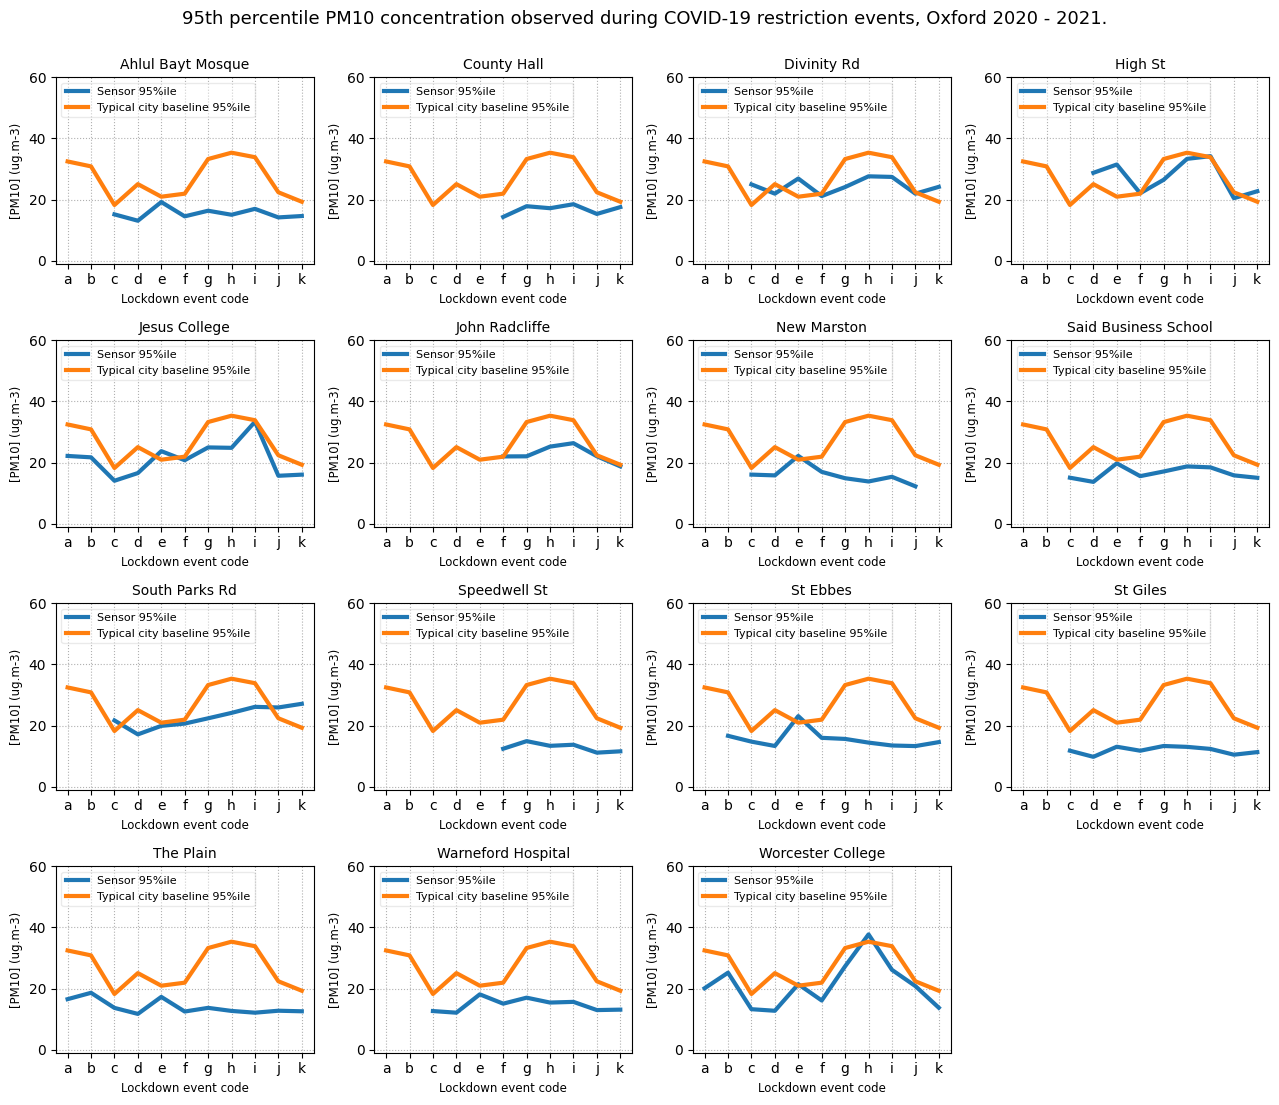

,count,mean,std,min,25%,50%,75%,90%,95%,max,metric
fname,,,,,,,,,,,
Ahlul Bayt Mosque,9.0,9.907664,1.255888,8.440139,8.790611,10.244155,10.531673,11.434610,11.643991,11.853372,pm10_mean
County Hall,6.0,10.748147,1.476187,8.648486,9.881707,10.972945,11.383045,12.157983,12.507391,12.856799,pm10_mean
Divinity Rd,9.0,16.378420,1.943231,14.199028,14.879767,16.492131,17.169697,19.094926,19.331324,19.567723,pm10_mean
High St,8.0,17.671985,3.335329,13.879433,14.368326,17.599574,20.141493,21.573167,22.111361,22.649555,pm10_mean
Jesus College,11.0,14.159355,3.613201,9.091214,10.864564,14.640859,16.333282,17.503930,19.061586,20.619242,pm10_mean
John Radcliffe,6.0,14.091621,2.012848,11.785835,12.903026,13.422593,15.633484,16.556535,16.687478,16.818421,pm10_mean
New Marston,8.0,10.492495,2.266522,7.534520,9.568256,10.170257,10.630070,12.289046,13.891397,15.493748,pm10_mean
Said Business School,9.0,10.410707,1.650442,8.517385,9.065317,10.010022,11.899154,12.358401,12.729437,13.100472,pm10_mean
South Parks Rd,9.0,14.854683,2.374318,10.644060,13.151841,14.671564,16.752090,17.106710,17.542338,17.977966,pm10_mean


In [17]:
# Hybrid St Ebbes-High St PM10 sensor correction vs St Ebbes refs
# ----------------------------------------------------------------

# Variables
# ----------
df = sensor_ld_event_stats_1.iloc[:,0:8].reset_index().merge(sebbes_pm10_ld_event_desc_mean[['ld_code','pm10_mean','pm10_90%','pm10_95%']], 
                                                             left_on='ld_code',
                                                             right_on='ld_code',
                                                             how='left',
                                                             suffixes=(None,'_s')
                                                            ).rename(columns={'pm10_90%':'pm10_p90_s', 'pm10_95%':'pm10_p95_s'}).set_index(['ld_code'])

x_labels = [
    'a','b','c','d','e','f','g','h','i','j','k'
]

x_labels_df = pd.DataFrame(x_labels,columns=['event'])

x_ticks = range(len(x_labels))

plt.style.use('default')

fig, axes = plt.subplots(nrows=4,
                         ncols=4,
                         sharex=False,
                         sharey=False,
                         figsize=(13, 11))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('95th percentile PM10 concentration observed during COVID-19 restriction events, Oxford 2020 - 2021.',
             fontsize=13,
             y=1)

for i, r in df.groupby('fname'):
    if axes_list:  # if empty_list will evaluate as false.
            ax = axes_list.pop(0)
    
    ax.plot(r['pm10_p95'], lw=3, marker = '', label='Sensor 95%ile')
    ax.plot(r['pm10_p95_s'], lw=3, marker = '', label='Typical city baseline 95%ile')
    ax.set_title(i, fontsize=10)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8.5)
    ax.set_xlabel('Lockdown event code', fontsize=8.5)
    ax.set_ylim(-1,60)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.legend(framealpha=0.4, loc='upper left', markerscale=3, fontsize=8, ncol=1)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.tight_layout()
    ax.grid(True,ls=':')
    #print(mae_dat)

fig.delaxes(axes_list.pop(-1))

#plt.savefig(stats_home+'sensor_ld_event_desc_pm10_1_p95.png')
plt.show()

for ax in axes_list:
    ax.remove()
    
df = df.reset_index(drop=True).set_index('fname').groupby('fname').describe(percentiles=[0.25,0.5,0.75,0.9,0.95])['pm10_p95']
df['metric'] = 'pm10_p95'
stats_df = stats_df.append(df)
display(stats_df)

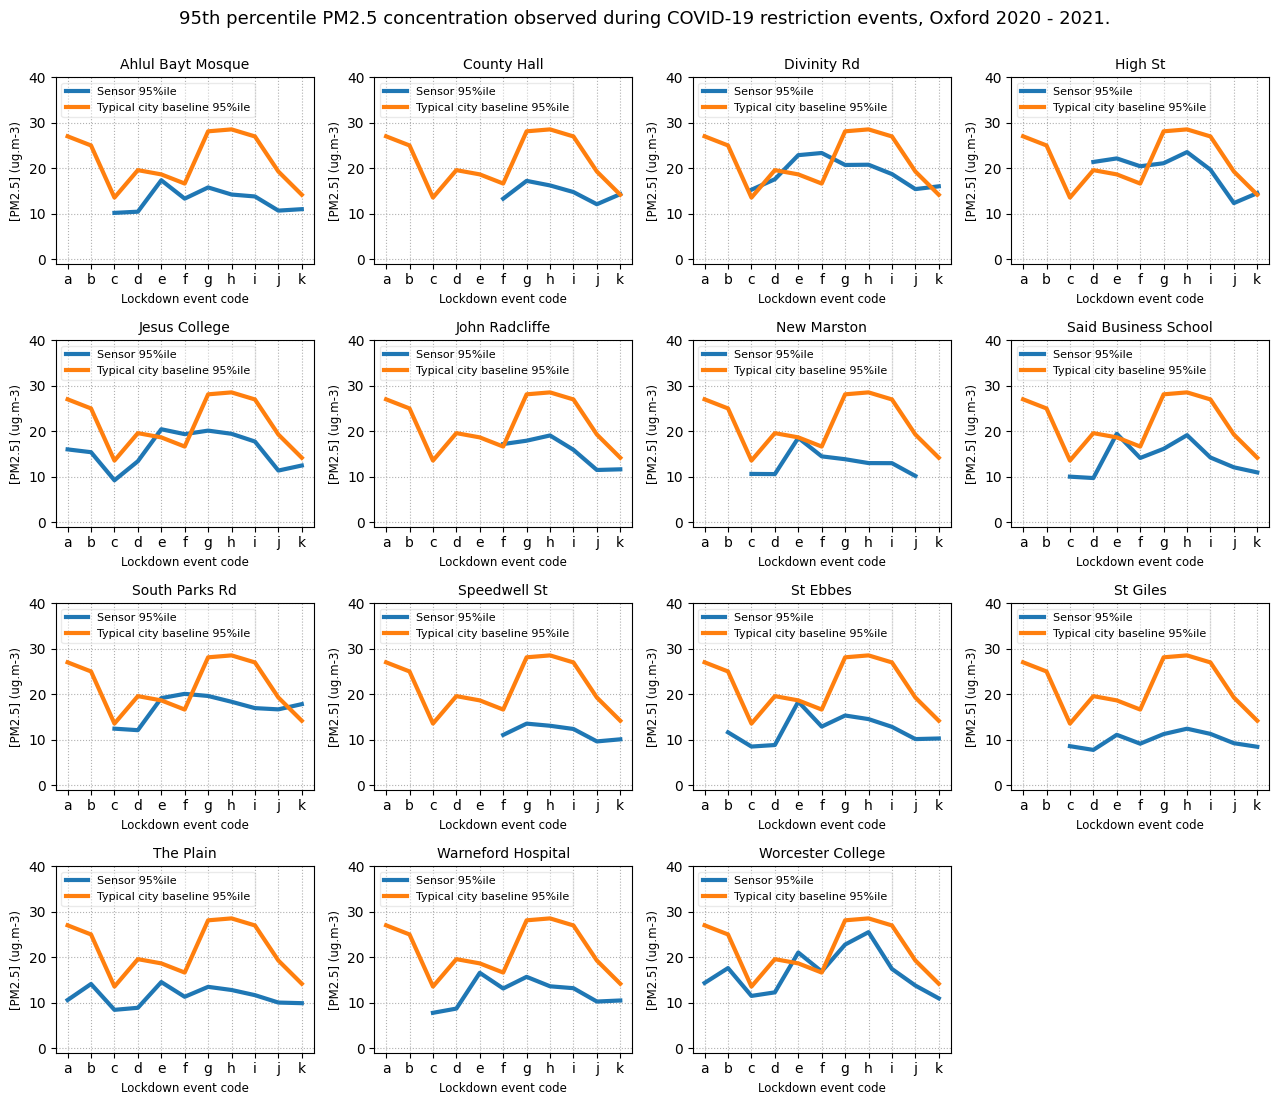

,count,mean,std,min,25%,50%,75%,90%,95%,max,metric
fname,,,,,,,,,,,
Ahlul Bayt Mosque,9.0,9.907664,1.255888,8.440139,8.790611,10.244155,10.531673,11.434610,11.643991,11.853372,pm10_mean
County Hall,6.0,10.748147,1.476187,8.648486,9.881707,10.972945,11.383045,12.157983,12.507391,12.856799,pm10_mean
Divinity Rd,9.0,16.378420,1.943231,14.199028,14.879767,16.492131,17.169697,19.094926,19.331324,19.567723,pm10_mean
High St,8.0,17.671985,3.335329,13.879433,14.368326,17.599574,20.141493,21.573167,22.111361,22.649555,pm10_mean
Jesus College,11.0,14.159355,3.613201,9.091214,10.864564,14.640859,16.333282,17.503930,19.061586,20.619242,pm10_mean
John Radcliffe,6.0,14.091621,2.012848,11.785835,12.903026,13.422593,15.633484,16.556535,16.687478,16.818421,pm10_mean
New Marston,8.0,10.492495,2.266522,7.534520,9.568256,10.170257,10.630070,12.289046,13.891397,15.493748,pm10_mean
Said Business School,9.0,10.410707,1.650442,8.517385,9.065317,10.010022,11.899154,12.358401,12.729437,13.100472,pm10_mean
South Parks Rd,9.0,14.854683,2.374318,10.644060,13.151841,14.671564,16.752090,17.106710,17.542338,17.977966,pm10_mean


In [18]:
# Hybrid St Ebbes-High St PM10 sensor correction vs St Ebbes refs
# ----------------------------------------------------------------

# Variables
# ----------
df = sensor_ld_event_stats_1.iloc[:,[0,9,10,11,12,13,14,15,16]].reset_index().merge(sebbes_pm25_ld_event_desc_mean[['ld_code','pm25_mean','pm25_90%','pm25_95%']], 
                                                             left_on='ld_code',
                                                             right_on='ld_code',
                                                             how='left',
                                                             suffixes=(None,'_s')
                                                            ).rename(columns={'pm25_90%':'pm25_p90_s','pm25_95%':'pm25_p95_s'}).set_index(['ld_code'])

x_labels = [
    'a','b','c','d','e','f','g','h','i','j','k'
]

x_labels_df = pd.DataFrame(x_labels,columns=['event'])

x_ticks = range(len(x_labels))

plt.style.use('default')

fig, axes = plt.subplots(nrows=4,
                         ncols=4,
                         sharex=False,
                         sharey=False,
                         figsize=(13, 11))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('95th percentile PM2.5 concentration observed during COVID-19 restriction events, Oxford 2020 - 2021.',
             fontsize=13,
             y=1)

for i, r in df.groupby('fname'):
    if axes_list:  # if empty_list will evaluate as false.
            ax = axes_list.pop(0)
    
    ax.plot(r['pm25_p95'], lw=3, marker = '', label='Sensor 95%ile')
    ax.plot(r['pm25_p95_s'], lw=3, marker = '', label='Typical city baseline 95%ile')
    ax.set_title(i, fontsize=10)
    ax.set_ylabel('[PM2.5] (ug.m-3)', fontsize=8.5)
    ax.set_xlabel('Lockdown event code', fontsize=8.5)
    ax.set_ylim(-1,40)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.legend(framealpha=0.4, loc='upper left', markerscale=3, fontsize=8, ncol=1)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.tight_layout()
    ax.grid(True,ls=':')
    #print(mae_dat)

fig.delaxes(axes_list.pop(-1))

#plt.savefig(stats_home+'sensor_ld_event_desc_pm25_1_p95.png')
plt.show()

for ax in axes_list:
    ax.remove()
    
df = df.reset_index(drop=True).set_index('fname').groupby('fname').describe(percentiles=[0.25,0.5,0.75,0.9,0.95])['pm25_p95']
df['metric'] = 'pm25_p95'
stats_df = stats_df.append(df)
display(stats_df)

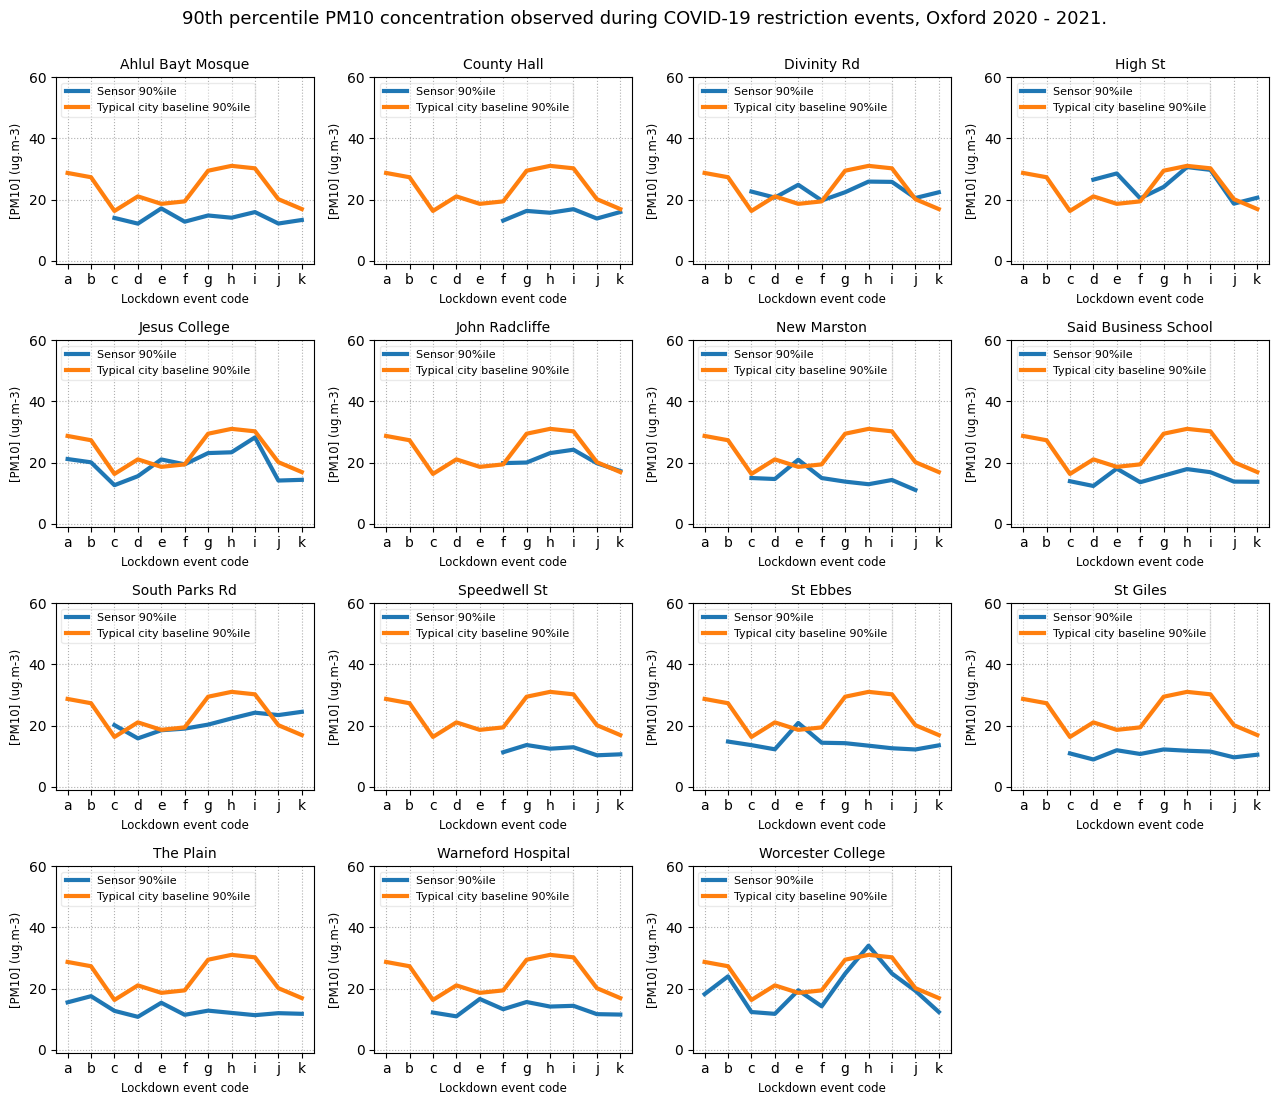

,count,mean,std,min,25%,50%,75%,90%,95%,max,metric
fname,,,,,,,,,,,
Ahlul Bayt Mosque,9.0,9.907664,1.255888,8.440139,8.790611,10.244155,10.531673,11.434610,11.643991,11.853372,pm10_mean
County Hall,6.0,10.748147,1.476187,8.648486,9.881707,10.972945,11.383045,12.157983,12.507391,12.856799,pm10_mean
Divinity Rd,9.0,16.378420,1.943231,14.199028,14.879767,16.492131,17.169697,19.094926,19.331324,19.567723,pm10_mean
High St,8.0,17.671985,3.335329,13.879433,14.368326,17.599574,20.141493,21.573167,22.111361,22.649555,pm10_mean
Jesus College,11.0,14.159355,3.613201,9.091214,10.864564,14.640859,16.333282,17.503930,19.061586,20.619242,pm10_mean
...,...,...,...,...,...,...,...,...,...,...,...
St Ebbes,10.0,14.172377,2.509803,12.173191,12.780836,13.556504,14.340383,15.371730,18.111644,20.851558,pm10_p90
St Giles,9.0,10.874239,1.103105,8.893466,10.457984,10.877226,11.764270,11.974210,12.076397,12.178584,pm10_p90
The Plain,11.0,12.996847,2.151952,10.744297,11.570449,12.030276,14.061770,15.486855,16.494586,17.502317,pm10_p90


In [19]:
# Hybrid St Ebbes-High St PM10 sensor correction vs St Ebbes refs
# ----------------------------------------------------------------

# Variables
# ----------
df = sensor_ld_event_stats_1.iloc[:,0:8].reset_index().merge(sebbes_pm10_ld_event_desc_mean[['ld_code','pm10_mean','pm10_90%','pm10_95%']], 
                                                             left_on='ld_code',
                                                             right_on='ld_code',
                                                             how='left',
                                                             suffixes=(None,'_s')
                                                            ).rename(columns={'pm10_90%':'pm10_p90_s', 'pm10_95%':'pm10_p95_s'}).set_index(['ld_code'])

x_labels = [
    'a','b','c','d','e','f','g','h','i','j','k'
]

x_labels_df = pd.DataFrame(x_labels,columns=['event'])

x_ticks = range(len(x_labels))

plt.style.use('default')

fig, axes = plt.subplots(nrows=4,
                         ncols=4,
                         sharex=False,
                         sharey=False,
                         figsize=(13, 11))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('90th percentile PM10 concentration observed during COVID-19 restriction events, Oxford 2020 - 2021.',
             fontsize=13,
             y=1)

for i, r in df.groupby('fname'):
    if axes_list:  # if empty_list will evaluate as false.
            ax = axes_list.pop(0)
    
    ax.plot(r['pm10_p90'], lw=3, marker = '', label='Sensor 90%ile')
    ax.plot(r['pm10_p90_s'], lw=3, marker = '', label='Typical city baseline 90%ile')
    ax.set_title(i, fontsize=10)
    ax.set_ylabel('[PM10] (ug.m-3)', fontsize=8.5)
    ax.set_xlabel('Lockdown event code', fontsize=8.5)
    ax.set_ylim(-1,60)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.legend(framealpha=0.4, loc='upper left', markerscale=3, fontsize=8, ncol=1)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.tight_layout()
    ax.grid(True,ls=':')
    #print(mae_dat)

fig.delaxes(axes_list.pop(-1))

#plt.savefig(stats_home+'sensor_ld_event_desc_pm10_1_p95.png')
plt.show()

for ax in axes_list:
    ax.remove()
    
df = df.reset_index(drop=True).set_index('fname').groupby('fname').describe(percentiles=[0.25,0.5,0.75,0.9,0.95])['pm10_p90']
df['metric'] = 'pm10_p90'
stats_df = stats_df.append(df)
display(stats_df)

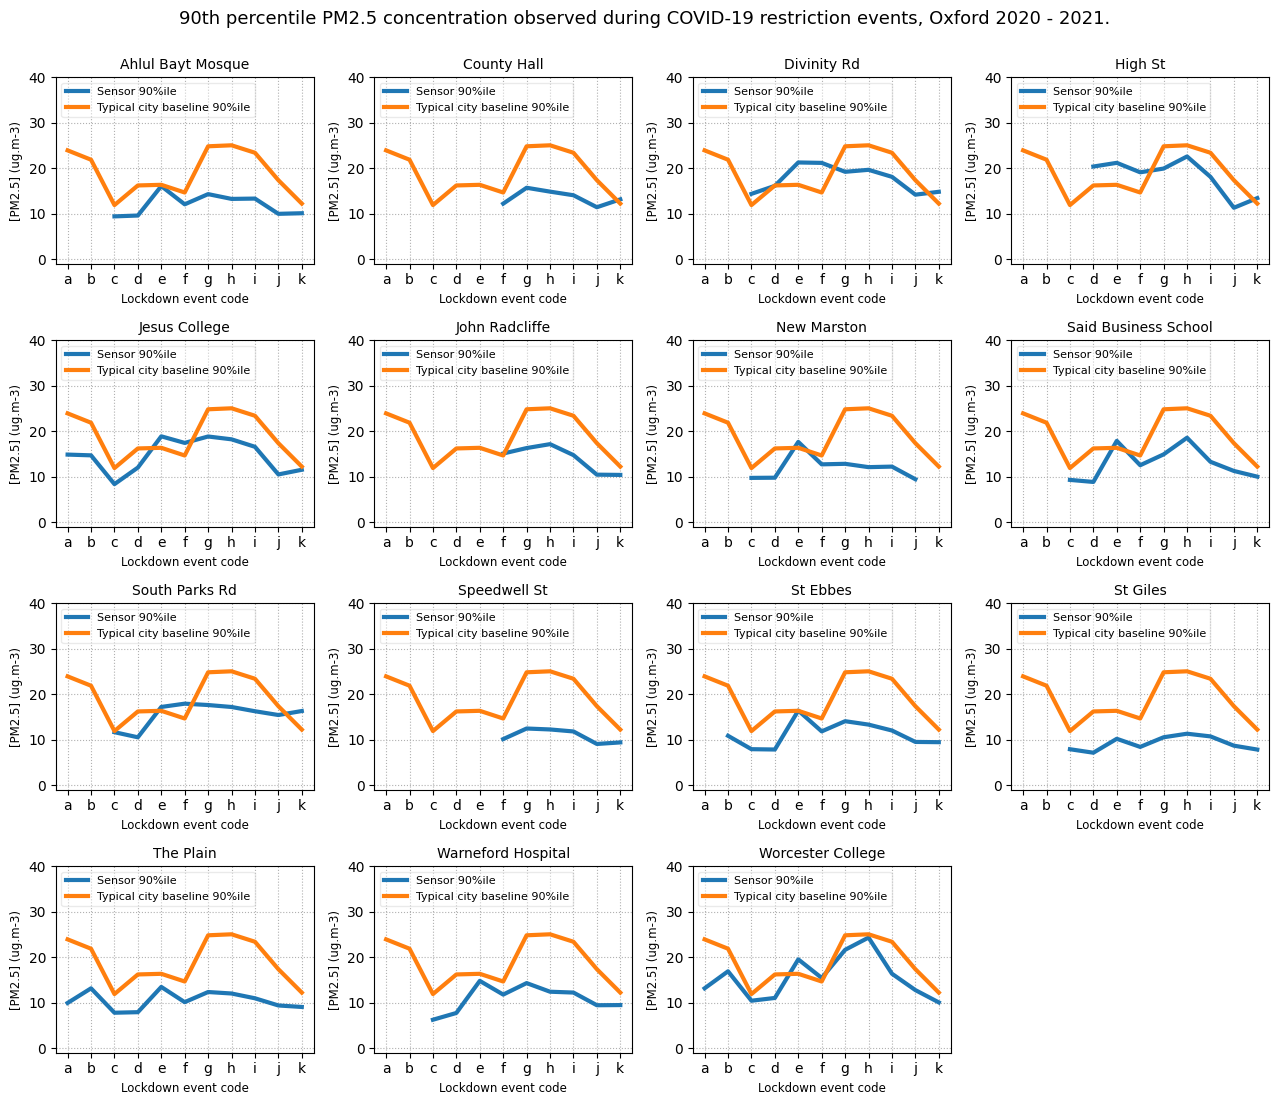

,count,mean,std,min,25%,50%,75%,90%,95%,max,metric
fname,,,,,,,,,,,
Ahlul Bayt Mosque,9.0,9.907664,1.255888,8.440139,8.790611,10.244155,10.531673,11.434610,11.643991,11.853372,pm10_mean
County Hall,6.0,10.748147,1.476187,8.648486,9.881707,10.972945,11.383045,12.157983,12.507391,12.856799,pm10_mean
Divinity Rd,9.0,16.378420,1.943231,14.199028,14.879767,16.492131,17.169697,19.094926,19.331324,19.567723,pm10_mean
High St,8.0,17.671985,3.335329,13.879433,14.368326,17.599574,20.141493,21.573167,22.111361,22.649555,pm10_mean
Jesus College,11.0,14.159355,3.613201,9.091214,10.864564,14.640859,16.333282,17.503930,19.061586,20.619242,pm10_mean
...,...,...,...,...,...,...,...,...,...,...,...
St Ebbes,10.0,11.326096,2.766431,7.844460,9.472570,11.345835,12.999216,14.307265,15.359719,16.412173,pm25_p90
St Giles,9.0,9.197761,1.511971,7.140190,7.907246,8.689254,10.538596,10.848677,11.084340,11.320003,pm25_p90
The Plain,11.0,10.566612,1.988563,7.796358,9.230363,10.123664,12.189315,13.162671,13.316191,13.469711,pm25_p90


In [20]:
# Hybrid St Ebbes-High St PM10 sensor correction vs St Ebbes refs
# ----------------------------------------------------------------

# Variables
# ----------
df = sensor_ld_event_stats_1.iloc[:,[0,9,10,11,12,13,14,15,16]].reset_index().merge(sebbes_pm25_ld_event_desc_mean[['ld_code','pm25_mean','pm25_90%','pm25_95%']], 
                                                             left_on='ld_code',
                                                             right_on='ld_code',
                                                             how='left',
                                                             suffixes=(None,'_s')
                                                            ).rename(columns={'pm25_90%':'pm25_p90_s','pm25_95%':'pm25_p95_s'}).set_index(['ld_code'])

x_labels = [
    'a','b','c','d','e','f','g','h','i','j','k'
]

x_labels_df = pd.DataFrame(x_labels,columns=['event'])

x_ticks = range(len(x_labels))

plt.style.use('default')

fig, axes = plt.subplots(nrows=4,
                         ncols=4,
                         sharex=False,
                         sharey=False,
                         figsize=(13, 11))
axes_list = [item for sublist in axes for item in sublist]

fig.suptitle('90th percentile PM2.5 concentration observed during COVID-19 restriction events, Oxford 2020 - 2021.',
             fontsize=13,
             y=1)

for i, r in df.groupby('fname'):
    if axes_list:  # if empty_list will evaluate as false.
            ax = axes_list.pop(0)
    
    ax.plot(r['pm25_p90'], lw=3, marker = '', label='Sensor 90%ile')
    ax.plot(r['pm25_p90_s'], lw=3, marker = '', label='Typical city baseline 90%ile')
    ax.set_title(i, fontsize=10)
    ax.set_ylabel('[PM2.5] (ug.m-3)', fontsize=8.5)
    ax.set_xlabel('Lockdown event code', fontsize=8.5)
    ax.set_ylim(-1,40)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.legend(framealpha=0.4, loc='upper left', markerscale=3, fontsize=8, ncol=1)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)
    plt.tight_layout()
    ax.grid(True,ls=':')
    #print(mae_dat)

fig.delaxes(axes_list.pop(-1))

#plt.savefig(stats_home+'sensor_ld_event_desc_pm25_1_p95.png')
plt.show()

for ax in axes_list:
    ax.remove()
    
df = df.reset_index(drop=True).set_index('fname').groupby('fname').describe(percentiles=[0.25,0.5,0.75,0.9,0.95])['pm25_p90']
df['metric'] = 'pm25_p90'
stats_df = stats_df.append(df)
display(stats_df)

In [21]:
stats_df.to_csv(stats_home+'pm_network_statistics_for_study_period_all_sensors_fcor_1619_9095.csv')

In [22]:
# Creat a table of differentials - pm10 mean
#--------------------------------------------
df = sensor_ld_event_stats_1.iloc[:,0:8].reset_index().merge(sebbes_pm10_ld_event_desc_mean[['ld_code','pm10_mean','pm10_95%']], 
                                                             left_on='ld_code',
                                                             right_on='ld_code',
                                                             how='left',
                                                             suffixes=(None,'_s')
                                                            ).rename(columns={'pm10_95%':'pm10_p95_s'})

df['dif_pm10_mean'] = df['pm10_mean'] - df['pm10_mean_s']
df['dif_pm10_95'] = df['pm10_p95'] - df['pm10_p95_s']

df = df.rename(columns={'ld_code': 'Event code', 'fname': 'Sensor'})
df2 = df[['Event code','Sensor','dif_pm10_mean']].pivot(index='Sensor',columns='Event code').round(1).droplevel(0, axis=1)
df2.loc['Mean',:] = df2.mean(axis=0)
df2.loc[:,'Mean'] = df2.mean(axis=1)
print('\n Difference in daily mean sensor PM10 concentration vs typical daily mean PM10 concentration by event code\n')
display(df2.style.applymap(lambda x: 'color: k' if np.isnan(x) else ('color: green' if x < 0 else 'color: red')).format("{:.1f}", na_rep='-'))

print('\n Difference in daily 95%ile sensor PM10 concentration vs typical daily 95%ile PM10 concentration by event code\n')
df3 = df[['Event code','Sensor','dif_pm10_95']].pivot(index='Sensor',columns='Event code').round(1).droplevel(0, axis=1)
df3.loc['Mean',:] = df2.mean(axis=0)
df3.loc[:,'Mean'] = df2.mean(axis=1)
display(df3.style.applymap(lambda x: 'color: k' if np.isnan(x) else ('color: green' if x < 0 else 'color: red')).format("{:.1f}", na_rep='-'))


 Difference in daily mean sensor PM10 concentration vs typical daily mean PM10 concentration by event code



Event code,a,b,c,d,e,f,g,h,i,j,k,Mean
Sensor,,,,,,,,,,,,
Ahlul Bayt Mosque,-,-,0.1,-3.2,-0.1,-1.7,-5.2,-6.6,-5.0,-3.9,-1.3,-3.0
County Hall,-,-,-,-,-,-1.8,-4.3,-5.9,-4.0,-2.8,0.5,-3.1
Divinity Rd,-,-,6.4,3.1,5.7,3.7,0.9,2.5,2.1,2.7,4.1,3.5
High St,-,-,-,6.2,8.4,3.9,1.4,5.6,4.3,1.5,4.0,4.4
Jesus College,-0.8,0.1,-1.0,-0.9,3.9,3.8,1.2,0.5,3.8,-1.5,-0.4,0.8
John Radcliffe,-,-,-,-,-,2.3,-2.1,-0.7,-0.0,0.8,1.5,0.3
New Marston,-,-,0.8,-1.4,4.1,-0.5,-6.2,-7.5,-6.3,-4.8,-,-2.7
Said Business School,-,-,-0.1,-3.3,0.5,-1.7,-5.1,-3.9,-4.7,-2.8,-1.2,-2.5
South Parks Rd,-,-,4.1,-1.1,1.7,2.4,-1.1,-0.1,1.1,4.1,6.5,2.0



 Difference in daily 95%ile sensor PM10 concentration vs typical daily 95%ile PM10 concentration by event code



Event code,a,b,c,d,e,f,g,h,i,j,k,Mean
Sensor,,,,,,,,,,,,
Ahlul Bayt Mosque,-,-,-3.1,-12.0,-1.7,-7.4,-16.9,-20.3,-16.9,-8.2,-4.7,-3.0
County Hall,-,-,-,-,-,-7.6,-15.4,-18.2,-15.4,-7.1,-1.8,-3.1
Divinity Rd,-,-,6.7,-3.1,5.9,-0.8,-9.2,-7.7,-6.5,-0.5,4.9,3.5
High St,-,-,-,3.7,10.5,0.1,-6.8,-2.0,0.3,-1.9,3.4,4.4
Jesus College,-10.3,-9.1,-4.2,-8.5,2.8,-1.2,-8.3,-10.5,-0.5,-6.7,-3.2,0.8
John Radcliffe,-,-,-,-,-,0.1,-11.2,-10.1,-7.5,-0.3,-0.5,0.3
New Marston,-,-,-2.2,-9.3,1.2,-5.0,-18.4,-21.5,-18.5,-10.1,-,-2.7
Said Business School,-,-,-3.2,-11.4,-1.2,-6.4,-16.2,-16.6,-15.4,-6.6,-4.3,-2.5
South Parks Rd,-,-,3.5,-7.9,-1.0,-1.3,-10.9,-11.2,-7.7,3.5,7.8,2.0
